### Initialization and Filtering Data

In [1]:
!pip install rpy2

    100% |████████████████████████████████| 194kB 2.8MB/s 
    Complete output from command python setup.py egg_info:
    Error: Tried to guess R's HOME but no command 'R' in the PATH.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-build-7t0s8pfn/rpy2/
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install pymer4

    100% |████████████████████████████████| 184kB 3.8MB/s 
    100% |████████████████████████████████| 184kB 4.2MB/s 
    Complete output from command python setup.py egg_info:
    Error: Tried to guess R's HOME but no command 'R' in the PATH.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-build-emwusakl/rpy2/


In [10]:
'''
instruction on modules installing:
If python shows "no module name xyz", use code below to install modules on your terminal
!pip install module_name
Run this cell once everytime you open this notebook to make sure the libraries are installed
'''

# April 15 2018: The gspread is frequently being updated, so to ensure stable workflow I specify the version
!pip install gspread==2.1.1
!pip install gspread-dataframe==2.1.0
!pip install pandas==0.22.0
#Keyboard shortcut: ctrl+enter -> run current cell;  shift+enter -> run current cell and move to the next

'\ninstruction on modules installing:\nIf python shows "no module name xyz", use code below to install modules on your terminal\n!pip install module_name\nRun this cell once everytime you open this notebook to make sure the libraries are installed\n'

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   # print every line without using "print"

In [0]:
#import packages
import pandas as pd
# from rpy2.robjects import r
# import rpy2.robjects.pandas2ri as pandas2ri
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [13]:
def import_data(filename):
  spreadsheet = gc.open(filename) # Open file using its name. Use this if the file is already anywhere in your drive
  sheet =  spreadsheet.get_worksheet(0)  # 0 means the first sheet in the file
  df = pd.DataFrame(sheet.get_all_records())
  return(df)


weather = import_data("WeatherAmsterdam_till_20180219.xlsx")
print(weather.head(2))

        Date             Event  Precipitation (in)  Precipitation (mm)  \
0  9/21/2017                                  0.00               0.000   
1  9/22/2017  Fog\r\n,\r\nRain                0.01               0.254   

   avgtempC  avgtempF  
0      14.4        58  
1      12.2        54  


In [0]:
# !pip list | grep pandas

In [0]:
# !pip list | grep gspread-dataframe


In [14]:
weather = weather.loc[:,['Date', 'avgtempC','Precipitation (mm)','Event']]
weather['Date'] = weather['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y') )
weather = weather[0:-1]
print(weather.head(3))

        Date  avgtempC  Precipitation (mm)             Event
0 2017-09-21      14.4               0.000                  
1 2017-09-22      12.2               0.254  Fog\r\n,\r\nRain
2 2017-09-23      12.2               0.000               Fog


In [2]:

print('Target users for analysis: users who have data in both the old and new challenges')
both_users = import_data("both_users_till_20180219.csv")
both_users['Date'] = both_users['Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
both_users['Steps'] = pd.to_numeric(both_users.Steps, errors='coerce')
# print(both_users.info())
print(both_users.head(5))


Target users for analysis: users who have data in both the old and new challenges


NameError: ignored

In [16]:

print('Exclude data where steps < 100  (Is it OK to do so?)')
realsteps = both_users.loc[  both_users['Steps'] >100].reset_index(drop=True)
print('Narrow down',len(both_users),'rows to', len(realsteps), 'rows')
print(realsteps.head())

Exclude data where steps < 100  (Is it OK to do so?)
Narrow down 270300 rows to 136543 rows
        Date                        ReportUniqueID    Steps Target_Steps  Week
0 2017-09-21  ac3341b1-9546-442b-9661-cf7cb8072740   7058.0                 38
1 2017-09-21  8202d5d3-e352-49aa-9879-63db2e9194ce   5772.0                 38
2 2017-09-21  1b8ded61-545d-4293-be5a-25eb237ee28b   6002.0                 38
3 2017-09-21  210f867a-6c67-4576-b63c-a3ca646ac669  12113.0                 38
4 2017-09-21  a8c4f81c-81be-4921-ad98-be17c00c7e3c   5291.0                 38


In [17]:
avg_steps = pd.DataFrame(realsteps.groupby("Date")['Steps'].mean()).reset_index()
print(avg_steps.tail(2))
print('Take out the last day due to incomplete data collection')
avg_steps = avg_steps[0:-1]
avg_steps.tail(2)

          Date        Steps
150 2018-02-18  6454.227586
151 2018-02-19   467.600000
Take out the last day due to incomplete data collection


,Date,Steps
149,2018-02-17,7402.095341
150,2018-02-18,6454.227586


### Analysis and Regression

(0, 9000)

[Text(0,0.5,'Average Steps per User'), Text(0.5,1,'Steps vs Temperature')]

TypeError: ignored

TypeError: ignored

(-5, 25)

[Text(0,0.5,'Average Temperature in Amsterdam')]

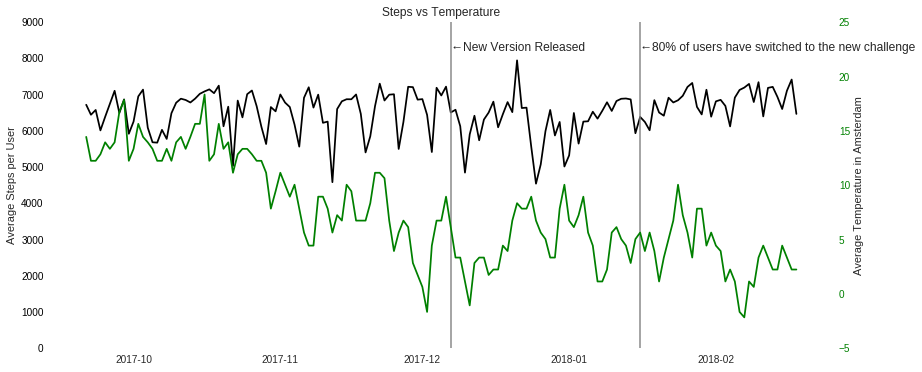

(0, 9000)

[Text(0,0.5,'Average Steps per User'), Text(0.5,1,'Steps vs Precipitation')]

TypeError: ignored

TypeError: ignored

(0, 20)

[Text(0,0.5,'Average Precipitation (mm) in Amsterdam')]

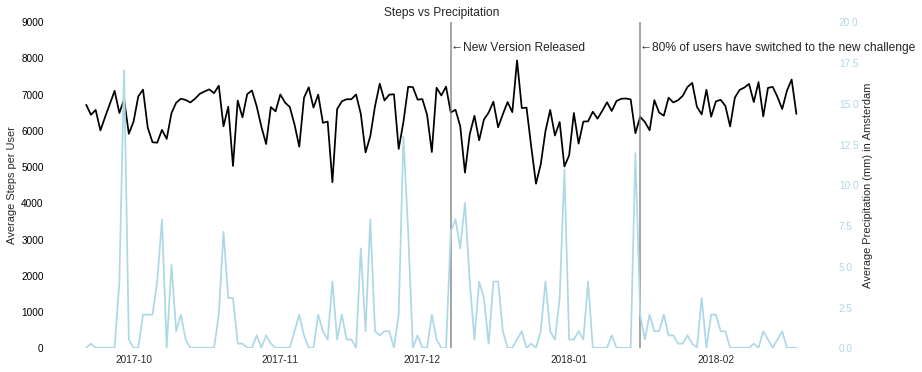

Average Steps before & after the new challgenge was released: 6541.0 6492.0
Average Steps before & after 80% of users upraded: 6436.0 6811.0


In [18]:
fig1  = plt.figure(figsize=(14,6))
ax = fig1.add_subplot(111)
ax.plot(avg_steps.Date, avg_steps.Steps, c='black', label='Average Steps')
ax.set_ylim(ymin=0, ymax=9000)
ax.tick_params('y', colors='black')

ax.set_facecolor('white')
ax.set(title='Steps vs Temperature', ylabel='Average Steps per User')
# s = "Correlation: " + str(np.corrcoef(avg_steps['Steps'], weather['avgtempC'])[0][1])
# ax.text('2017-09-21',2000,s)
ax.axvline(x='2017-12-07', color='grey', alpha=0.8)
ax.text('2017-12-07', 8200,'←New Version Released')
ax.axvline(x='2018-01-16',color='grey', alpha=0.8)
ax.text('2018-01-16', 8200,'←80% of users have switched to the new challenge')
ax.grid(linewidth=0)

bx = ax.twinx()
bx.plot(avg_steps.Date, weather['avgtempC'], c='g', label='Average Temperature')
bx.set_ylim(ymin=-5, ymax=25)
bx.tick_params('y', colors='g')
bx.set(ylabel='Average Temperature in Amsterdam')
bx.grid(linewidth=0)

# fig1.legend()
plt.show()

print('\n'*2)

fig2  = plt.figure(figsize=(14,6))
ax = fig2.add_subplot(111)
ax.plot(avg_steps.Date, avg_steps.Steps, c='black', label='Average Steps')
ax.set_ylim(ymin=0, ymax=9000)
ax.tick_params('y', colors='black')

ax.set_facecolor('white')
ax.set(title='Steps vs Precipitation', ylabel='Average Steps per User')
# s = "Correlation: " + str(np.corrcoef(avg_steps['Steps'], weather['avgtempC'])[0][1])
# ax.text('2017-09-21',2000,s)
ax.axvline(x='2017-12-07', color='grey', alpha=0.8)
ax.text('2017-12-07', 8200,'←New Version Released')
ax.axvline(x='2018-01-16',color='grey', alpha=0.8)
ax.text('2018-01-16', 8200,'←80% of users have switched to the new challenge')
ax.grid(linewidth=0)

bx = ax.twinx()
bx.plot(avg_steps.Date, weather['Precipitation (mm)'], c='lightblue', label='Average Temperature')
bx.set_ylim(ymin=0, ymax=20)
bx.tick_params('y', colors='lightblue')
bx.set(ylabel='Average Precipitation (mm) in Amsterdam')
bx.grid(linewidth=0)

# fig1.legend()
plt.show()

print('Average Steps before & after the new challgenge was released:', 
      round(avg_steps.loc[avg_steps['Date']<'2017-12-07']['Steps'].mean()),
      round(avg_steps.loc[avg_steps['Date']>'2017-12-07']['Steps'].mean()))

print('Average Steps before & after 80% of users upraded:', 
      round(avg_steps.loc[avg_steps['Date']<'2018-01-16']['Steps'].mean()),
      round(avg_steps.loc[avg_steps['Date']>'2018-01-16']['Steps'].mean()))



In [21]:
weather['Steps']=avg_steps['Steps']
weather.head(2)

,Date,avgtempC,Precipitation (mm),Event,Steps
0,2017-09-21,14.4,0.000,,6706.149123
1,2017-09-22,12.2,0.254,"Fog\r\n,\r\nRain",6430.347826


In [22]:
import statsmodels.api as sm

X = weather.iloc[:,[1,2]].values
y = weather.iloc[:, -1].values
model = sm.OLS(y, X)
results = model.fit()
print("OLS Regression：", '\n', "y=steps, x1=average temperature, x2 = precipitation")
print(results.summary())

OLS Regression： 
 y=steps, x1=average temperature, x2 = precipitation
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 17 Apr 2018   Prob (F-statistic):           1.98e-42
Time:                        18:17:51   Log-Likelihood:                -1443.7
No. Observations:                 151   AIC:                             2891.
Df Residuals:                     149   BIC:                             2897.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**0406**

In [23]:
marshall_android = import_data("marshall_android.csv")
print(marshall_android.info())
marshall_android['date'] = marshall_android['date'].apply(lambda x: datetime.strptime(str(x),'%Y%m%d' ) )
marshall_android.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
app_id                247 non-null object
app_store             247 non-null object
app_version           247 non-null object
date                  247 non-null int64
event                 247 non-null object
key                   247 non-null object
previous_timestamp    247 non-null object
previous_version      247 non-null object
timestamp             247 non-null object
user_id               247 non-null object
dtypes: int64(1), object(9)
memory usage: 19.4+ KB
None


,app_id,app_store,app_version,date,event,key,previous_timestamp,previous_version,timestamp,user_id
0,com.actify.actifymove,com.android.vending,1.1.1,2018-01-21,app_update,previous_app_version,NA,1.0.0,2018-01-21 19:34:10,749a1fe7-a5f0-4f12-82ef-5e7786228597
1,com.actify.actifymove,com.android.vending,2.0.0,2018-03-02,app_update,previous_app_version,NA,1.1.1,2018-03-02 7:43:26,673f9eed-f246-4cc5-b066-d350b011e80d


In [24]:

android_users = marshall_android['user_id'].unique().tolist()
print(len(android_users))

246


In [0]:
# np.corrcoef(avg_steps['Steps'], weather['avgtempC'])

In [26]:
print('Correlation between steps and temperature, before new app launching:',np.corrcoef(avg_steps.loc[avg_steps['Date']<'2017-12-07']['Steps'], weather.loc[weather['Date']<'2017-12-07']['avgtempC'])[0][1])
print('Correlation between steps and temperature, after new app launching:',np.corrcoef(avg_steps.loc[avg_steps['Date']>'2017-12-07']['Steps'], weather.loc[weather['Date']>'2017-12-07']['avgtempC'])[0][1])

Correlation between steps and temperature, before new app launching: 0.08648222482379621
Correlation between steps and temperature, after new app launching: -0.22337207419061442


**0409**

In [27]:
realsteps.head()

,Date,ReportUniqueID,Steps,Target_Steps,Week
0,2017-09-21,ac3341b1-9546-442b-9661-cf7cb8072740,7058.0,,38
1,2017-09-21,8202d5d3-e352-49aa-9879-63db2e9194ce,5772.0,,38
2,2017-09-21,1b8ded61-545d-4293-be5a-25eb237ee28b,6002.0,,38
3,2017-09-21,210f867a-6c67-4576-b63c-a3ca646ac669,12113.0,,38
4,2017-09-21,a8c4f81c-81be-4921-ad98-be17c00c7e3c,5291.0,,38


In [28]:
real_users = realsteps.ReportUniqueID.unique().tolist()
len(real_users)

1551

In [29]:
# find out andorid users in realsteps. Only two are found, so I simply took them out
t = []
for i in android_users:
  if(i in real_users):
    print(i)
    t.append(i)
realsteps = realsteps.loc[(realsteps.ReportUniqueID != 'cee5b079-a075-4046-8866-c762b1a7b6bd') & (realsteps.ReportUniqueID != '89ac68b3-ae84-4c42-bf0d-0c420490f75c') ]

cee5b079-a075-4046-8866-c762b1a7b6bd
89ac68b3-ae84-4c42-bf0d-0c420490f75c


In [30]:
updata = import_data('updata.csv')
updata = updata[['date','user_id']]
updata.head()

,date,user_id
0,20171210,e47e800a-63b9-4a19-ac7c-adc1eb54af49
1,20171210,26997168-52f4-42a9-aef3-ac15a6988aa8
2,20171210,90088d46-ab95-40a8-b890-053116a335ad
3,20171210,00f140c7-cb1b-4c80-8291-157115b7a9e8
4,20171210,3a6b565d-86fb-4945-8f9a-e064463cace8


In [31]:
# Further filter users containing version info
updata_users = updata.user_id.unique().tolist()
realreal_users = [i for i in real_users if i in updata_users]
len(realreal_users)-len(real_users)

-74

In [32]:
realsteps1 = realsteps.loc[realsteps.ReportUniqueID.isin(realreal_users)]
len(realsteps1)
realsteps1.to_csv('C:\\Users\Marshall\Desktop\realsteps1.csv')

133331

In [0]:
updata.date = pd.to_datetime(updata.date)

In [74]:
updata_dict = updata.set_index('user_id').to_dict()
updata_dict['date']['e47e800a-63b9-4a19-ac7c-adc1eb54af49'] 

Timestamp('1970-01-01 00:00:00.020171210')

In [0]:
# def new_or_old(test):
#     test['is_new_app'] = np.nan
#     for ind, row in test.iterrows():
#         if(row.Date > updata.loc[updata.user_id==row.ReportUniqueID,'date'].values[0]):
#             test.loc[ind,'is_new_app']=0
#         else:
#             test.loc[ind,'is_new_app']=1
#     return(test)

        

# realsteps2 = new_or_old(realsteps1)
# realsteps2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
test.head()

,Date,ReportUniqueID,Steps,Target_Steps,Week,is_new_app
0,2017-09-21,ac3341b1-9546-442b-9661-cf7cb8072740,7058.0,,38,NaN
1,2017-09-21,8202d5d3-e352-49aa-9879-63db2e9194ce,5772.0,,38,NaN
2,2017-09-21,1b8ded61-545d-4293-be5a-25eb237ee28b,6002.0,,38,NaN
3,2017-09-21,210f867a-6c67-4576-b63c-a3ca646ac669,12113.0,,38,NaN
4,2017-09-21,a8c4f81c-81be-4921-ad98-be17c00c7e3c,5291.0,,38,NaN


In [93]:
pd.to_datetime('2001-01-01')  > updata.loc[updata.user_id=='ac3341b1-9546-442b-9661-cf7cb8072740','date'].values[0]

True

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133392 entries, 0 to 136542
Data columns (total 6 columns):
Date              133392 non-null datetime64[ns]
ReportUniqueID    133392 non-null object
Steps             133392 non-null float64
Target_Steps      133392 non-null object
Week              133392 non-null int64
is_new_app        0 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.1+ MB


In [0]:
realsteps1.to_csv("realsteps1.csv")
from google.colab import files
files.download("realsteps1.csv")
# pd.read_csv("C:\\Users\Marshall\Desktop\realsteps1.csv")

In [0]:
weather.to_csv("weather.csv")
files.download("weather.csv")

In [0]:
updata.to_csv("updata.csv")
files.download("updata.csv")

In [0]:
realsteps2['temp'] = np.nan
realsteps2['precipitation'] = np.nan
for ind, row in realsteps2.iterrows():
    temp = weather.loc[ weather['Date']== row['Date']  , ['avgtempC', 'Precipitation (mm)']  ].values[0]
    realsteps2.loc[ind, 'temp'] = temp[0]
    realsteps2.loc[ind, 'precipitation'] = temp[1]
    
    

In [62]:
weather.loc[ weather['Date']== '2017-10-10'  , ['avgtempC', 'Precipitation (mm)']  ].values[0]

array([13.9  ,  1.016])

In [64]:
len(weather.loc[ weather['Date']== '1997-10-10'  , ['avgtempC', 'Precipitation (mm)']  ].values)

0

In [58]:
len(realsteps1.loc[realsteps1.Target_Steps==''])/len(realsteps1)
print("About 40% of targets are empty")

0.39433440085201493

About 40% of targets are empty


In [55]:
realsteps1.Target_Steps.unique()

array(['', 7000, 9000, 8000, 10000, 5000, 6000, 7733, 8858, 6244, 2000,
       8190, 3000, 4040, 7500, 2500, 7038, 9250, 8500, 2250, 4750, 4500,
       3899, 8435, 5479, 7250, 3750, 6250, 6500, 4000, 9750, 3500, 5500,
       9500, 5250, 2750, 3250, 5750, 7750, 4250, 8750, 6750, 4540, 4899,
       8935, 5793, 5979, 8038, 5899, 9435, 8982, 8250, 8358, 3540, 8538,
       6899, 9482, 7899, 7233, 9538, 8482, 7244, 6233, 6858, 3040, 6358,
       6744, 9982, 6401, 7786, 14000, 12000, 22000, 11000, 17000, 18000,
       20000, 13000, 15000, 11250, 14250, 21750, 13250, 10750, 11750,
       12250, 10250, 17750, 14750, 20250, 15250, 11500, 14500, 13500,
       10500, 17500, 12750, 12500, 15500, 21500, 13750, 16750, 17250,
       19750, 21250, 16500, 15750, 16000, 16250, 21000], dtype=object)

In [68]:
t = []
for ind, row in realsteps1.head().iterrows():
    t.append(row['Date'])
t

[Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-21 00:00:00')]